In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 4. 순서형 데이터

순서형 데이터(Ordinal data)는 서로 다른 카테고리에 속하면서도, 일정한 순서나 계층 구조를 가지는 데이 터입니다. 순서형 데이터는 명목형 데이터와 달리, 순서나 계층 구조가 있는 점에서 차이가 있습니다. 예 를 들어, 만족도 조사에서 고객의 만족도 수준을 "매우 만족", "약간 만족", "보통", "약간 불만족", "매우 불 만족"으로 측정한 경우, 이 데이터는 순서형 데이터입니다.

### *막대 그래프*

In [23]:
#데이터 읽어오기
data = pd.read_csv("./data/college_data.csv")

#Top10perc 기준으로 학교를 4개의 그룹으로 나누어 순서형 데이터로 처리
data['admission_level'] = pd.qcut(data['top10perc'], q=4, labels=['very_low', 'low', 'high', 'very_high'])

print(data)

    private   apps  accept  enroll  top10perc  top25perc  f_undergrad   
0       Yes   1660    1232     721         23         52         2885  \
1       Yes   2186    1924     512         16         29         2683   
2       Yes   1428    1097     336         22         50         1036   
3       Yes    417     349     137         60         89          510   
4       Yes    193     146      55         16         44          249   
..      ...    ...     ...     ...        ...        ...          ...   
772      No   2197    1515     543          4         26         3089   
773     Yes   1959    1805     695         24         47         2849   
774     Yes   2097    1915     695         34         61         2793   
775     Yes  10705    2453    1317         95         99         5217   
776     Yes   2989    1855     691         28         63         2988   

     p_undergrad  outstate  room_board  books  personal  phd  terminal   
0            537      7440        3300    450    

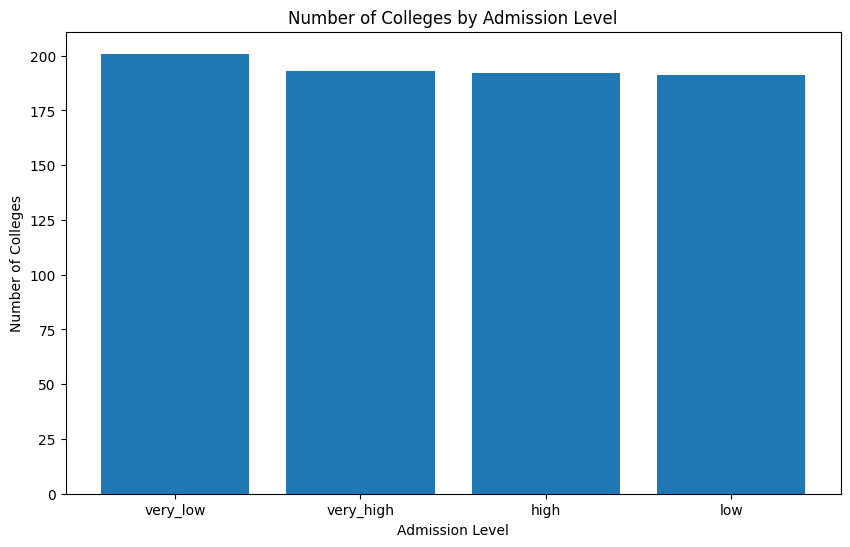

In [24]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(data['admission_level'].value_counts().index, data['admission_level'].value_counts().values)
plt.title('Number of Colleges by Admission Level')
plt.xlabel('Admission Level')
plt.ylabel('Number of Colleges')
plt.show()

## 5. 이진 데이터

이진 데이터(Binary data)는 두 가지 값 중 하나만을 가지는 데이터를 말합니다. 예를 들어, 어떤 학생 이 시험에서 합격했는지 여부, 어떤 제품이 결함이 있는지 여부 등이 이진 데이터의 예시입니다. 이진 데이터는 명목형 데이터와 비슷하지만, 단지 두 가지의 값만 가지고 있으므로 이진형이라는 용 어가 사용됩니다.

### *막대 그래프*

     PassengerId  Survived  Pclass   
0              1         0       3  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp   
0                              Braund, Mr. Owen Harris    male  22.0      1  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

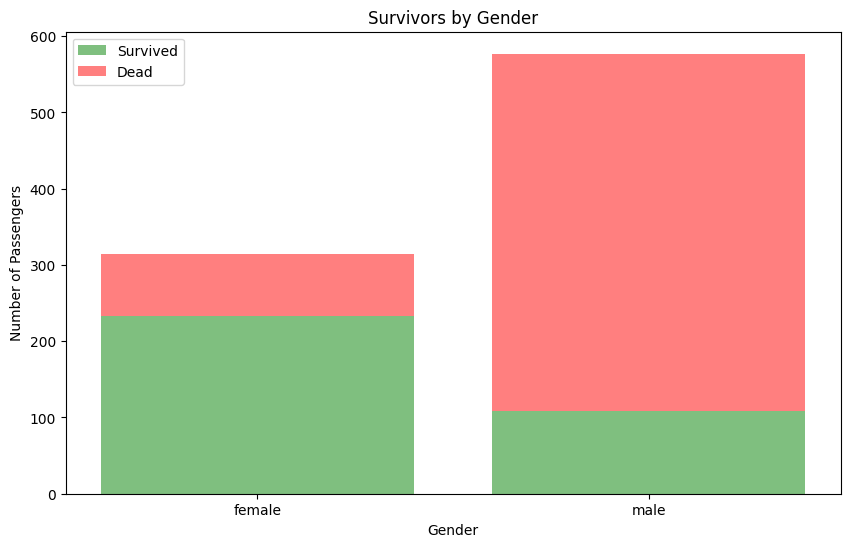

In [25]:
#데이터 불러오기
titanic = pd.read_csv("./data/Titanic_data.csv")
print(titanic)

#성별에 따른 생존자 수와 사망자 수 구하기
survived_gender = titanic.groupby('Sex')['Survived'].sum()
#전체 탑승객 - 생존자 = 사망자
dead_gender = titanic.groupby('Sex')['Survived'].count() - survived_gender

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(survived_gender.index, survived_gender.values, color='g', alpha=0.5, label='Survived')
plt.bar(dead_gender.index, dead_gender.values, bottom=survived_gender.values, color='r', alpha=0.5, label='Dead')
plt.title('Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

## 6. 시계열 데이터

시계열 데이터(Time Series Data)는 일정 시간 간격으로 측정된 데이터를 말합니다. 즉, 시간의 흐름에 따 라 변화하는 데이터를 의미합니다. 예를 들어, 매일 측정된 주식 시장의 주가, 1시간 간격으로 기록된 기온, 5초 간격으로 기록된 심전도 데이터 등이 시계열 데이터의 예시입니다.

In [26]:
#데이터 읽어오기

data = pd.read_csv("./data/kospi.csv")
print(data)

#Date 칼럼을 datatime 형식으로 변환하여 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#inplace=True는 기존 자리에 대치

            Date         Open         High          Low        Close   
0     1997-07-01   744.979980   760.520020   744.669983   758.030029  \
1     1997-07-02   763.390015   777.289978   763.390015   777.289978   
2     1997-07-03   778.820007   782.169983   773.270020   775.260010   
3     1997-07-04   776.020020   783.239990   773.900024   781.700012   
4     1997-07-07   781.500000   783.109985   772.140015   773.510010   
...          ...          ...          ...          ...          ...   
4933  2017-06-28  2382.909912  2390.889893  2380.750000  2382.560059   
4934  2017-06-29  2396.810059  2402.800049  2393.570068  2395.659912   
4935  2017-07-03  2397.659912  2399.899902  2384.550049  2394.479980   
4936  2017-07-04  2395.239990  2398.020020  2376.409912  2380.520020   
4937  2017-07-07  2376.290039  2385.020020  2376.290039  2379.719971   

        Adj Close  Volume  
0      758.030029       0  
1      777.289978       0  
2      775.260010       0  
3      781.700012      

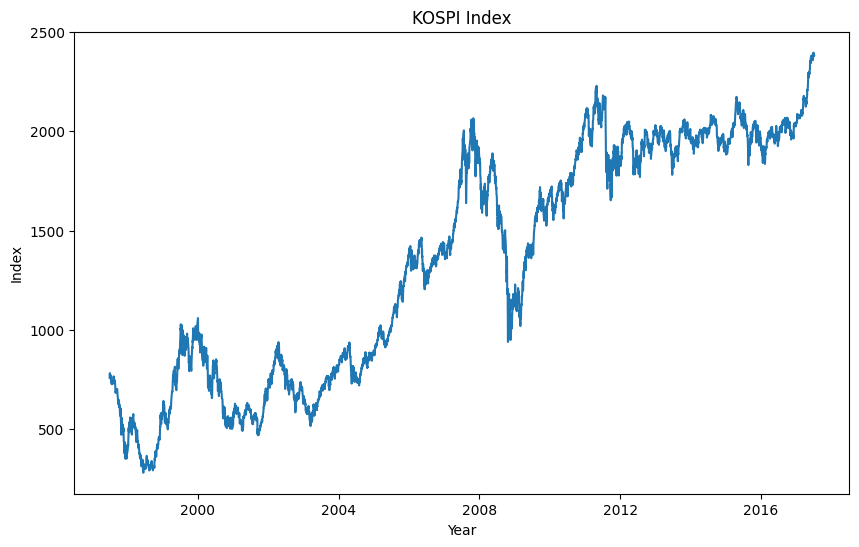

In [27]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'])
plt.title('KOSPI Index')
plt.xlabel('Year')
plt.ylabel('Index')
plt.show()

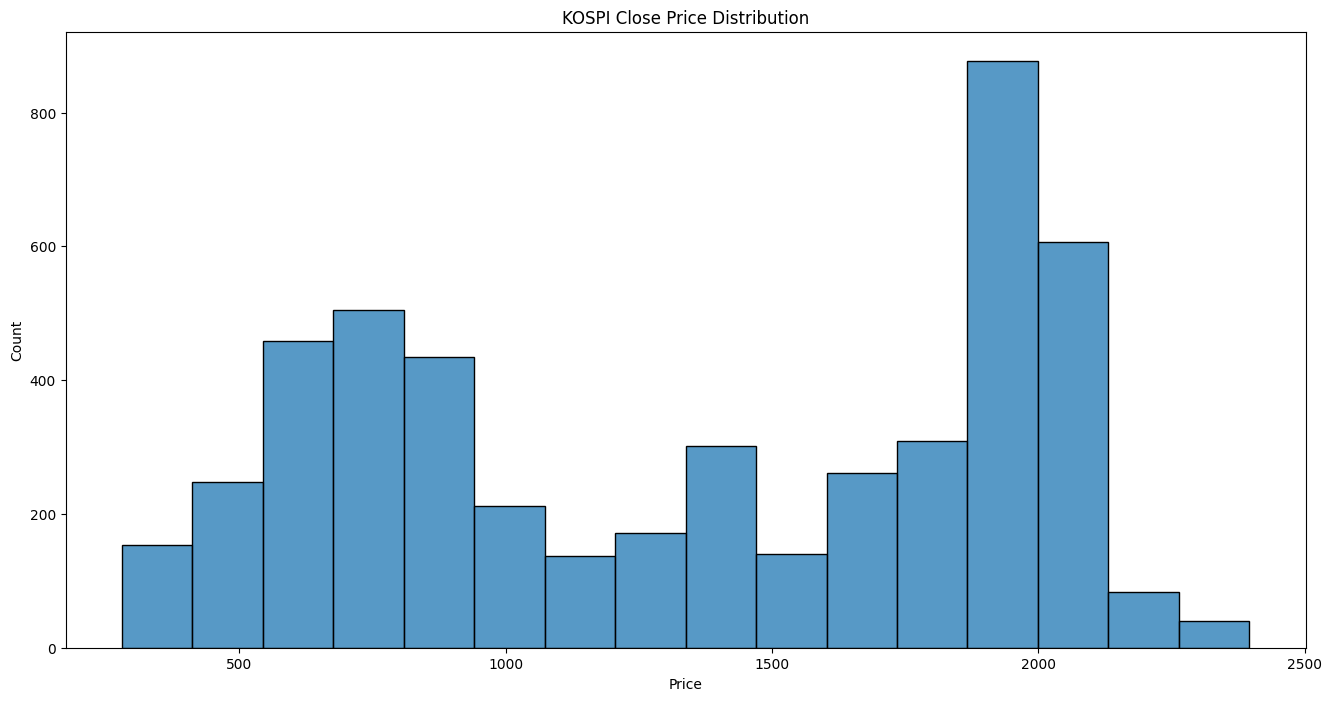

In [28]:
#히스토그램 그래프 그리기
plt.figure(figsize=(16,8))
sns.histplot(data=data, x='Close')

#그래프 타이틀 설정
plt.title("KOSPI Close Price Distribution")

#x, y 축 라벨 설정
plt.xlabel("Price")
plt.ylabel("Count")

plt.show()

## 7. 공간 데이터

지리 정보와 관련된 데이터를 말합니다. 즉, 지도상의 위치 정보를 가지고 있는 데이터를 의미합니다. 공간 데이터는 위치 정보를 가지고 있으므로, 지도 상의 경계, 거리, 면적, 위치 등을 분석하고 시각화할 수 있습니다.

In [29]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


### *GeoJSON*

지리 정보를 다루는 JSON (JavaScript Object Notation) 형식의 데이터 교환 형식입니다.
공간 데이터를 표현하기 위한 포맷으로서, 지리적 좌표 및 속성 데이터를 특정 구조로 표현하고, 이를
다른 소프트웨어나 서비스에서 사용할 수 있게 합니다.

여러 가지 공간 데이터 유형을 지원하며, 대부분의 GIS (Geographic Information System) 소프트웨어와 웹매핑 라이브러리에서 지원되는 공통 형식입니다.

일반적으로 웹 기반 지도 서비스에서 자주 사용되는 데이터 형식 중 하나입니다.

<Figure size 1000x1000 with 0 Axes>

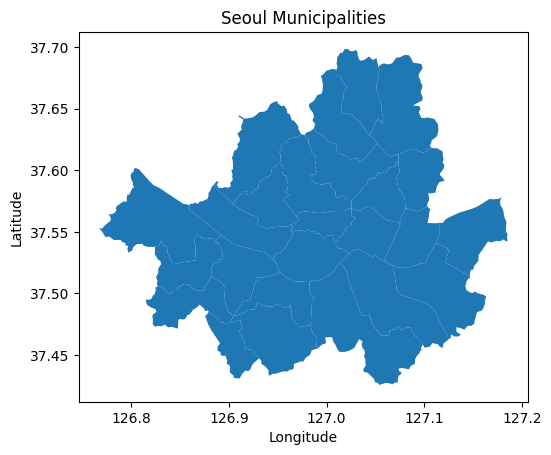

In [31]:
import geopandas as gpd

#서울시 행정구역 경계 데이터 읽기
seoul_gdf = gpd.read_file('./data/seoul_municipalities_geo_simple.shx')

#그래프 크기 설정
plt.figure(figsize=(10, 10))

#서울시 행정구역 경계 데이터 시각화
seoul_gdf.plot()

#그래프 타이틀 설정
plt.title('Seoul Municipalities')

#x, y 축 라벨 설정
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#그래프 표시
plt.show()